# Feature Extraction

## Dependencies

In [70]:
import os,warnings;warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',font_scale=0.8)
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score

In [72]:
## Tmporting the file
cvd_data = pd.read_csv('/Users/rad7/Documents/Desktop/AIML lab/MINI PROJECT/Dataset/Processed_CVD_data.csv')

In [74]:
cvd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567766 entries, 0 to 567765
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                567766 non-null  int64  
 1   Age_Category                  567766 non-null  int64  
 2   Diabetes                      567766 non-null  float64
 3   FriedPotato_Consumption       567766 non-null  float64
 4   BMI                           567766 non-null  float64
 5   Height_(cm)                   567766 non-null  float64
 6   Weight_(kg)                   567766 non-null  float64
 7   Alcohol_Consumption           567766 non-null  float64
 8   Green_Vegetables_Consumption  567766 non-null  float64
 9   Exercise                      567766 non-null  int64  
 10  Fruit_Consumption             567766 non-null  float64
 11  Depression                    567766 non-null  int64  
 12  Checkup                       567766 non-nul

In [76]:
cvd_data.head()

,General_Health,Age_Category,Diabetes,FriedPotato_Consumption,BMI,Height_(cm),Weight_(kg),Alcohol_Consumption,Green_Vegetables_Consumption,Exercise,Fruit_Consumption,Depression,Checkup,Other_Cancer,Arthritis,Skin_Cancer,Sex,Smoking_History,Heart_Disease
0,1,11,0.0,12.0,14.54,150.0,32.66,0.0,16.0,0,30.0,0,4,0,1,0,0,1,0
1,4,11,1.0,4.0,28.29,165.0,77.11,0.0,0.0,0,30.0,0,5,0,0,0,0,0,1
2,4,9,1.0,16.0,33.47,163.0,88.45,4.0,3.0,1,12.0,0,5,0,0,0,0,0,0
3,1,12,1.0,8.0,28.73,180.0,93.44,0.0,30.0,1,30.0,0,5,0,0,0,1,0,1
4,3,13,0.0,0.0,24.37,191.0,88.45,0.0,4.0,0,8.0,0,5,0,0,0,1,1,0


In [78]:
cvd_data.describe()

,General_Health,Age_Category,Diabetes,FriedPotato_Consumption,BMI,Height_(cm),Weight_(kg),Alcohol_Consumption,Green_Vegetables_Consumption,Exercise,Fruit_Consumption,Depression,Checkup,Other_Cancer,Arthritis,Skin_Cancer,Sex,Smoking_History,Heart_Disease
count,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.000000,567766.0
mean,2.981450,8.789042,0.250233,6.053559,29.122670,171.052109,85.494042,4.369864,14.196282,0.613830,28.639047,0.140482,4.711055,0.072218,0.343226,0.075531,0.505596,0.387084,0.5
std,1.138167,3.178541,0.386269,8.329702,6.456083,10.489132,21.355399,8.051721,14.170676,0.486871,24.421391,0.347487,0.691491,0.258849,0.474787,0.264247,0.499969,0.487084,0.5
min,1.000000,1.000000,0.000000,0.000000,12.020000,91.000000,24.950000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,7.000000,0.000000,1.417271,24.700421,163.000000,70.310000,0.000000,4.000000,0.000000,10.564536,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.000000,10.000000,0.000000,4.000000,28.130000,171.455419,82.550000,0.209885,11.513422,1.000000,30.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.5
75%,4.000000,11.000000,0.500000,8.000000,32.381243,178.516749,97.520000,4.000000,20.000000,1.000000,30.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0
max,5.000000,13.000000,1.000000,128.000000,99.330000,241.000000,293.020000,30.000000,128.000000,1.000000,120.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [80]:
cvd_data.isnull().sum()

General_Health                  0
Age_Category                    0
Diabetes                        0
FriedPotato_Consumption         0
BMI                             0
Height_(cm)                     0
Weight_(kg)                     0
Alcohol_Consumption             0
Green_Vegetables_Consumption    0
Exercise                        0
Fruit_Consumption               0
Depression                      0
Checkup                         0
Other_Cancer                    0
Arthritis                       0
Skin_Cancer                     0
Sex                             0
Smoking_History                 0
Heart_Disease                   0
dtype: int64

In [82]:
cvd_data.duplicated().sum()

791

***info*** method suggests we have a full dataset, with no missing values
***head*** method suggests that our target variable has already been converted to a categorical feature
***value_count*** method suggest out binary classifcation problem is well balanced & a metric like accuracy is quite approapriate here
We can note that dataset is quite entry level friendly, very little preprocessing is required to move on the the modelling phase

### Plot a Shifted Correlation Matrix 

In [86]:

# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(10,5))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')

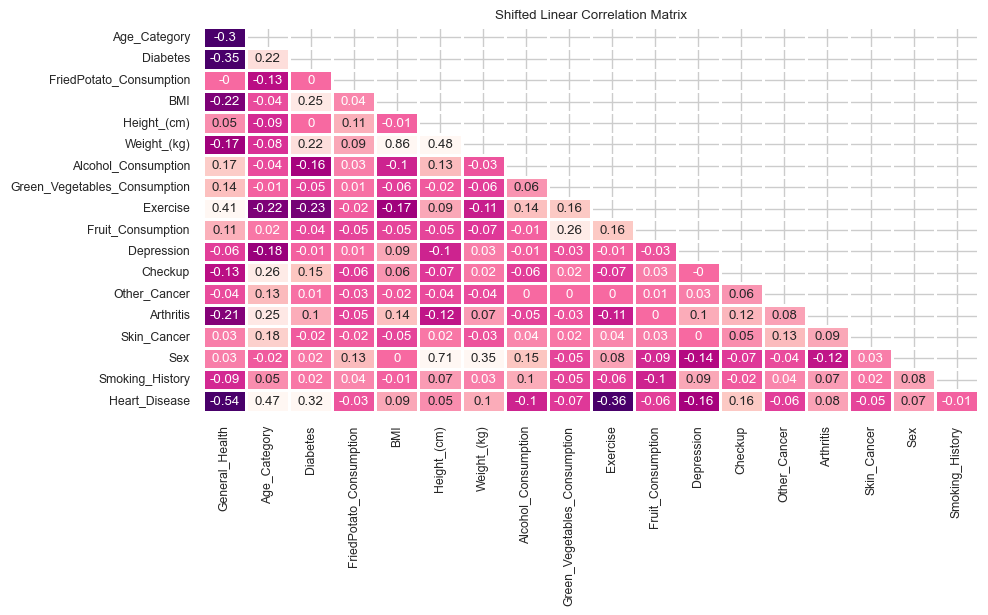

In [88]:
corrMat(cvd_data)

# Key Observations

## Heart Disease Correlations:
- **Strong Negative Correlation (-0.53) with General Health** → Poor general health is associated with heart disease.
- **Moderate Negative Correlation (-0.34) with Diabetes** → Higher diabetes cases are linked to heart disease.
- **Moderate Negative Correlation (-0.22) with BMI** → Higher BMI is linked to heart disease, though the correlation is not very strong.

## Age and Health Indicators:
- **Age has a moderate negative correlation (-0.27) with General Health** → Older individuals report poorer general health.
- **Age has a moderate positive correlation (0.26) with Checkups** → Older individuals are more likely to have regular health checkups.

## Exercise:
- **Moderately Positive Correlation (0.41) with General Health** → Regular exercise is linked to better health.
- **Slight Negative Correlation (-0.06) with Heart Disease** → Exercise might have a minor protective effect against heart disease.

## Smoking and Alcohol Consumption:
- **Smoking History has weak correlations overall**, but it slightly affects **BMI (0.07)** and **Arthritis (0.11)**.
- **Alcohol Consumption has a weak positive correlation (0.16) with General Health** → Possibly indicating that moderate drinking is reported among healthier individuals.

## Food Consumption:
- **Green Vegetables Consumption (0.27) with Alcohol Consumption** → Suggests that individuals who consume alcohol also tend to consume more green vegetables.
- **Fruit Consumption has weak correlations across the board**.

# Conclusion:
- The **strongest factors influencing heart disease** appear to be **General Health, Diabetes, and BMI**.
- **Exercise positively impacts health** but does not have a strong direct correlation with reducing heart disease.
- **Age plays a significant role** in health-related attributes such as **checkups and general health**.
- **Food consumption factors have weak correlations overall**, suggesting other **lifestyle or genetic factors** may be more dominant.

# ❯ BIVARIATE HISTOGRAMS
Bivariate histograms are split into several categories of similar similarity General patient,ECG,Blood,Pain related features, hue for both condition is compared.

## ***GENERAL FEATURE & PAIN RELATED FEATURES***

### **General Features**
These features describe overall **health status, lifestyle, and demographics**.

- **General_Health** → Self-reported health status (Excellent, Good, Fair, Poor).  
- **Checkup** → Frequency of medical checkups.  
- **Exercise** → Whether the person exercises regularly.  
- **Sex** → Gender of the individual.  
- **Age_Category** → Age groups (e.g., 18-24, 25-29, etc.).  
- **Height_(cm)** → Height of the person.  
- **Weight_(kg)** → Weight of the person.  
- **BMI** → Body Mass Index, calculated from height and weight.  
- **Smoking_History** → Whether the person has a history of smoking.  
- **Alcohol_Consumption** → Frequency of alcohol intake.  
- **Fruit_Consumption** → Frequency of fruit consumption.  
- **Green_Vegetables_Consumption** → Frequency of green vegetable consumption.  
- **FriedPotato_Consumption** → Frequency of fried potato consumption.  

---

## **Pain-Related Features**
These features are directly linked to **chronic conditions, pain, or diseases** that can cause discomfort.

- **Heart_Disease** → Whether the person has heart disease.  
- **Skin_Cancer** → History of skin cancer diagnosis.  
- **Other_Cancer** → History of other types of cancer.  
- **Depression** → Whether the person has been diagnosed with depression.  
- **Diabetes** → Whether the person has diabetes or pre-diabetes.  
- **Arthritis** → Whether the person has arthritis, a condition often associated with chronic pain.  

---

In [116]:
def nplot2count(list1,list2, title, df, cols=3, sample_size = 2000):
    # """
    # Function to plot multiple countplots for categorical variables.
    
    # Parameters:
    # - list1: List of categorical feature names.
    # - list2: List of labels corresponding to each feature in list1.
    # - title: Main title of the plot.
    # - df: DataFrame containing the data.
    # - cols: Number of columns in the subplot grid (default=3).
    # """

    # 
    #     sns.countplot(data=df, x=col, palette='coolwarm', ax=axes[i])
    #     axes[i].set_xlabel(label)
    #     axes[i].set_ylabel('Frequency')
    #     axes[i].set_title(f"Distribution of {label}")

    #     # Annotate bars inside with rotated text
    #     for p in axes[i].patches:
    #         height = p.get_height()
    #         if height > 0:  # Ensure there is a value to annotate
    #             axes[i].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
    #                          ha='center', va='bottom', fontsize=7, color='black')

    

   

    # # Reduce dataset if it's too large
    # if len(df) > sample_size:
    #     df = df.sample(sample_size, random_state=42)  # Take a random subset
    rows = (len(list1) + cols - 1) // cols  # Calculate required rows
    fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))

    # Ensure axes is always a NumPy array for consistent indexing
    axes = np.array(axes).flatten()  
    
    for i, (col, label) in enumerate(zip(list1, list2)):
        sns.countplot(x = col , hue = 'Heart_Disease', data = df, ax = axes[i])
        axes[i].set_xlabel(label)
        axes[i].set_ylabel('Frequency of patients')
        axes[i].set_title(f"Distribution of {label}")

    # Remove extra subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust for suptitle
    plt.show()

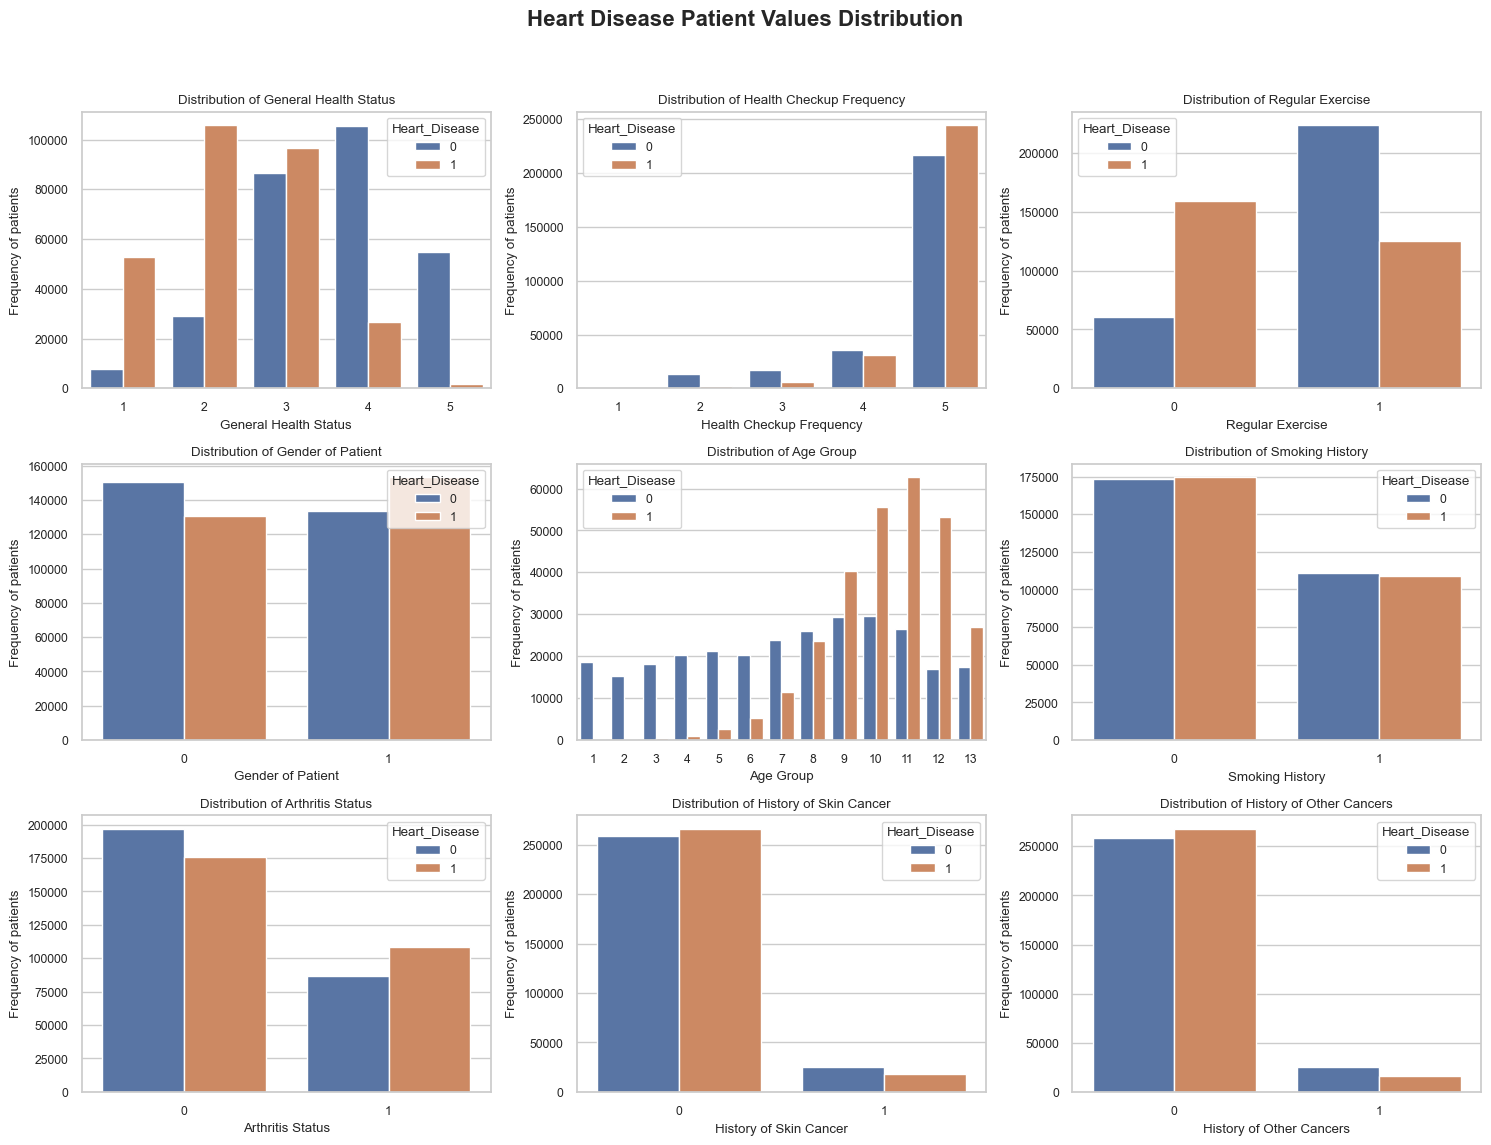

In [118]:
#general features frequency distribution
general_features = ['General_Health', 'Checkup', 'Exercise',
                    'Sex', 'Age_Category','Smoking_History',
                    'Arthritis','Skin_Cancer', 'Other_Cancer']
general_labels = ['General Health Status', 'Health Checkup Frequency', 'Regular Exercise',
                  'Gender of Patient', 'Age Group','Smoking History',
                  'Arthritis Status','History of Skin Cancer', 
                  'History of Other Cancers']

title = 'Heart Disease Patient Values Distribution'

nplot2count(general_features,general_labels,title,cvd_data)

### SNS PAIR GRID

For conutinuous Variables

In [124]:
def snsPairGrid(df, hue_column, sample_size=1000):
    """ Optimized PairGrid function with data sampling to improve speed """
    
    # Reduce dataset if it's too large
    if len(df) > sample_size:
        df = df.sample(sample_size, random_state=42)  # Take a random subset

    g = sns.PairGrid(df, diag_sharey=False, hue=hue_column, palette=['#2c3e50','#E888BB'])
    g.fig.set_size_inches(20,20)
    
    g.map_upper(sns.kdeplot, levels=3, thresh=0.1)  # Reduce KDE complexity
    g.map_diag(sns.kdeplot, lw=2)  # Reduce bins
    g.map_lower(sns.scatterplot, s=10, alpha=0.6)  # Reduce marker size and transparency
    
    g.add_legend()
    plt.tight_layout()


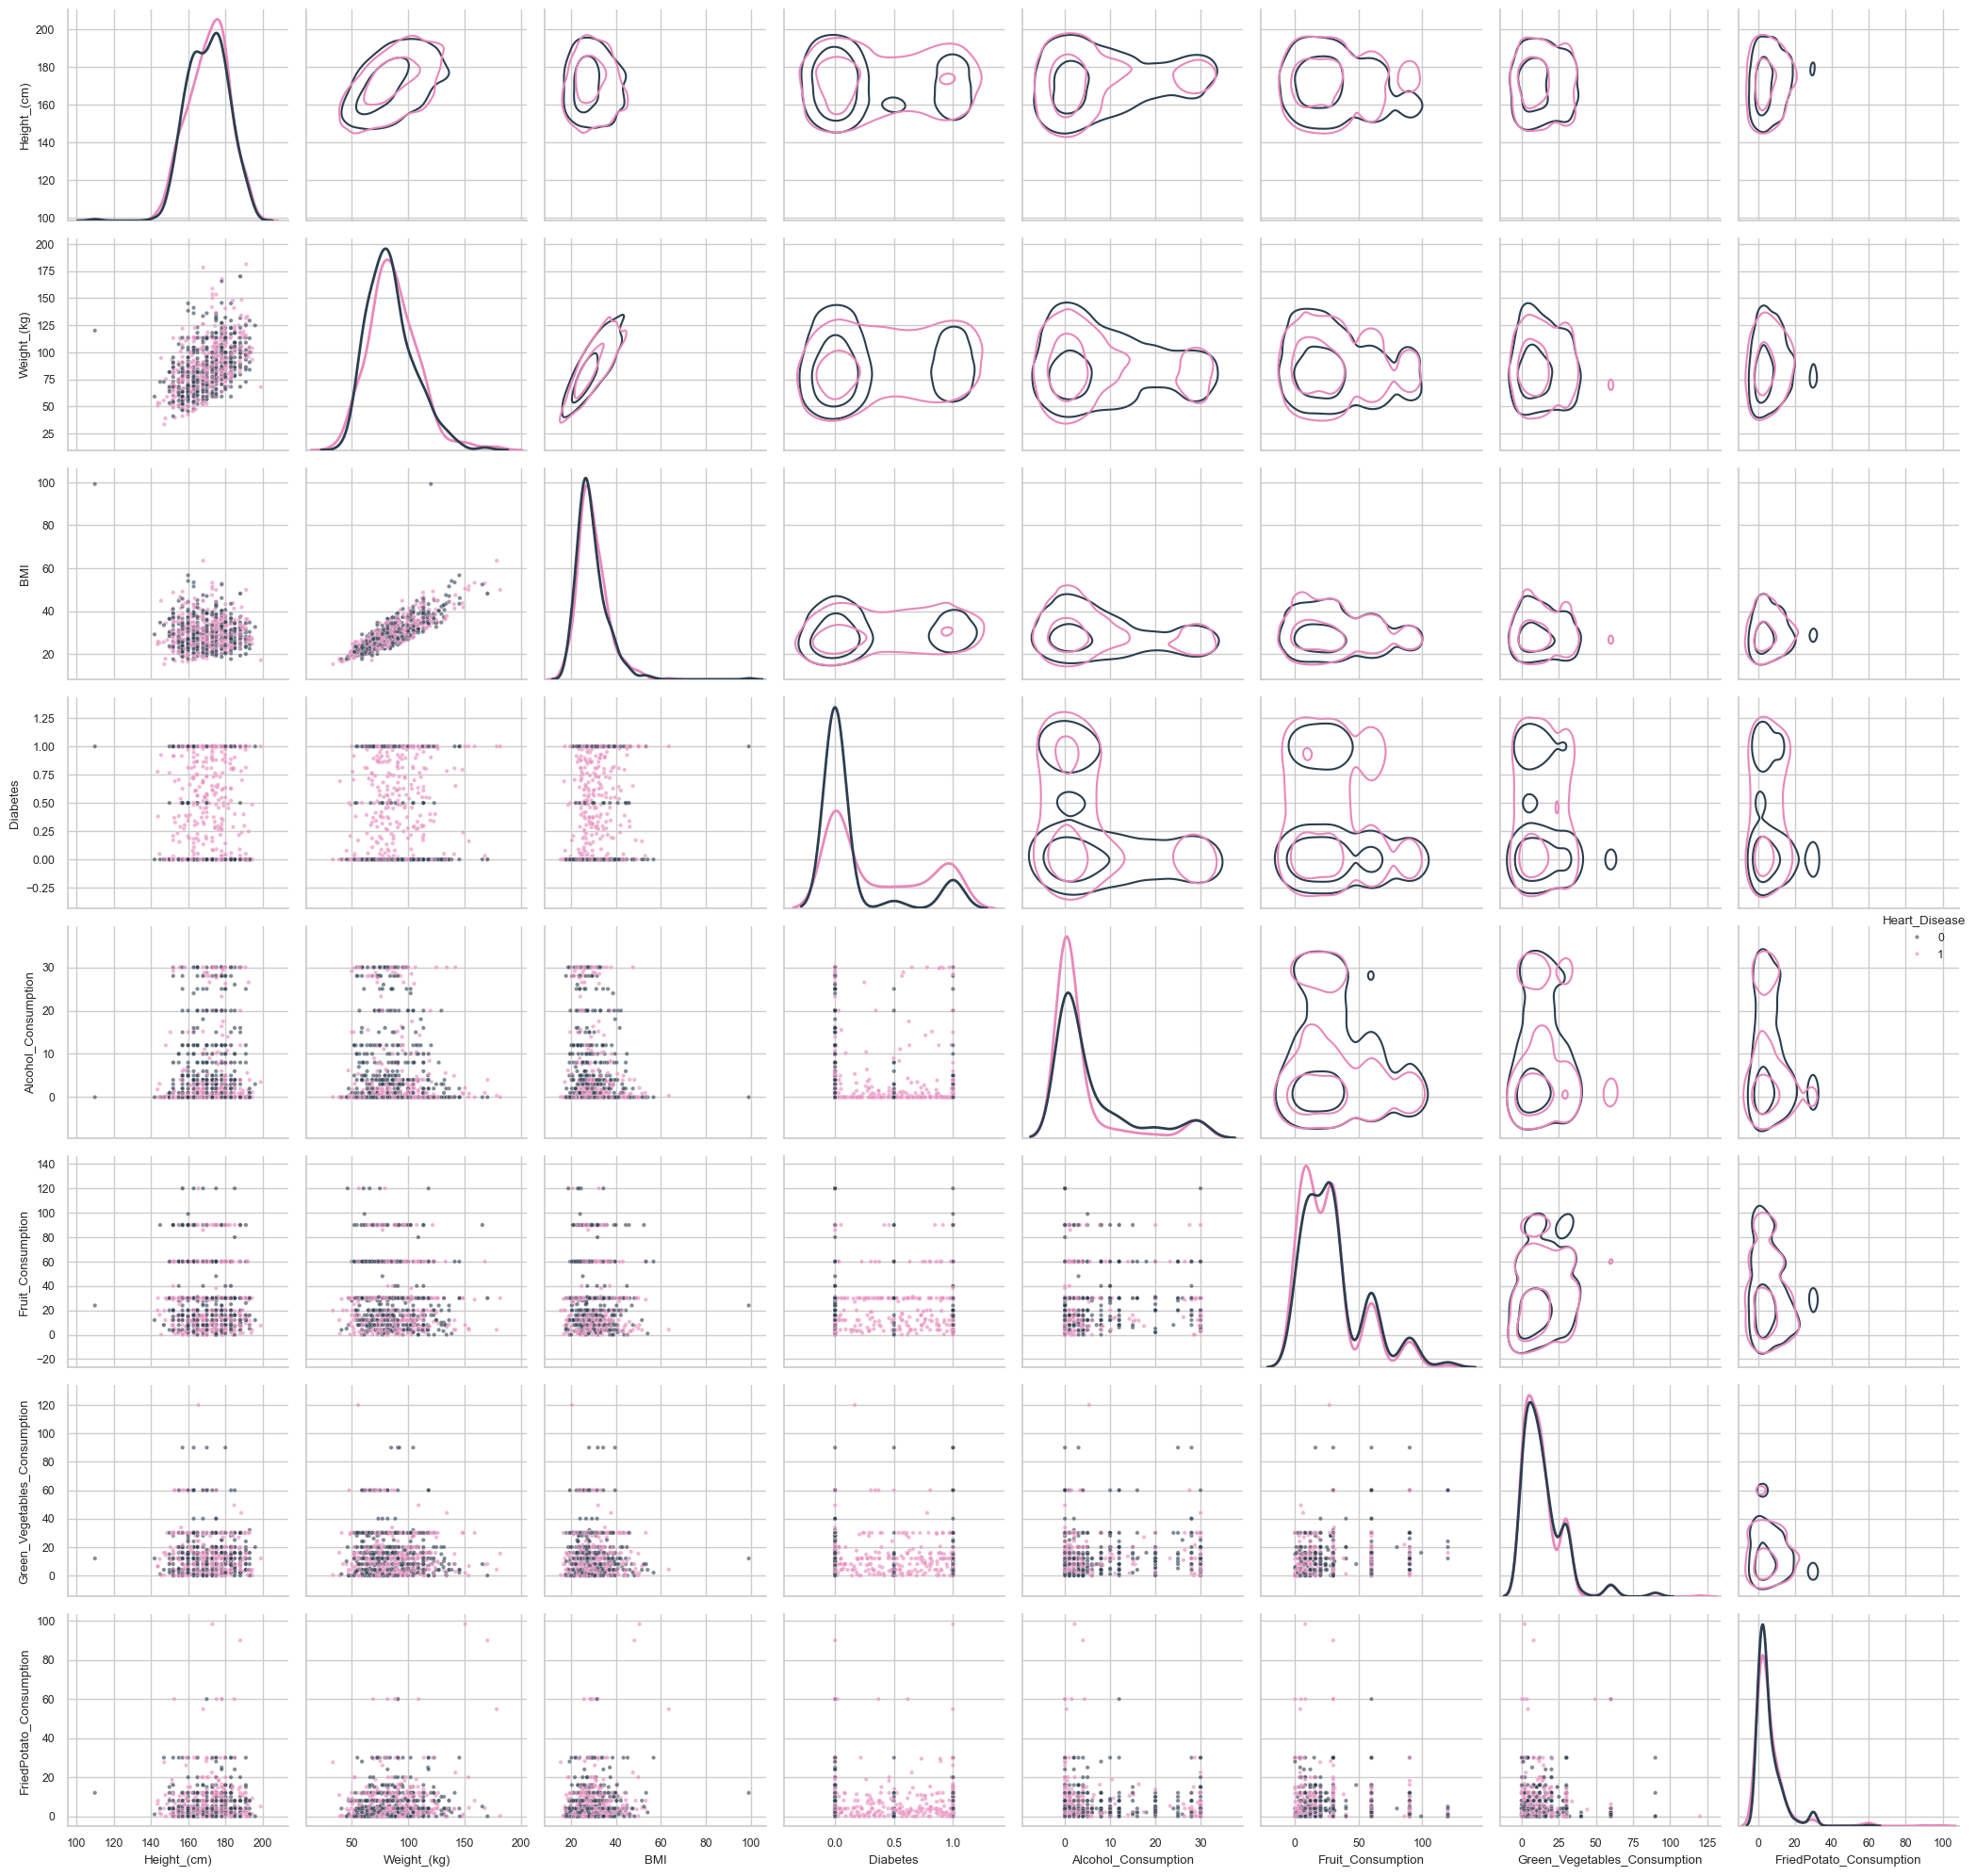

In [126]:
# Continuous numerical variables
numvars_targ = ['Height_(cm)', 'Weight_(kg)', 'BMI','Diabetes','Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
# Ensure 'condition' column is included
snsPairGrid(cvd_data[['Heart_Disease'] + numvars_targ], hue_column='Heart_Disease')

# Model Generation

In [22]:
#Sample usage for model training

from sklearn.gaussian_process import GaussianProcessClassifier as GPRC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.dummy import DummyClassifier as DC

from sklearn.datasets import load_iris
iris = load_iris();X = iris.data;y = iris.target 
model = DC(strategy="most_frequent");
model.fit(X,y);
print(f'DC(): {model.score(X,y)}')
model = GPRC();
model.fit(X,y);
print(f'GPRC(): {model.score(X,y)}')

model = RFC(n_estimators=10000,random_state=42);
model.fit(X,y);
print(f'RFC(): {model.score(X,y)}')

DC(): 0.3333333333333333
GPRC(): 0.9733333333333334
RFC(): 1.0


# Random Forest Classifier

The **Random Forest Classifier (RFC)** is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting. It is widely used for **classification problems** due to its robustness, efficiency, and ability to handle high-dimensional data.  

---

## **1. How RFC Works**
RFC follows these steps:  
1. **Bootstrap Sampling**: Randomly selects subsets of data with replacement to train multiple decision trees.  
2. **Feature Randomness**: At each split, it considers only a random subset of features to reduce correlation between trees.  
3. **Voting Mechanism**: Each tree predicts a class, and the final prediction is determined by **majority voting** (for classification).  

This approach helps improve **accuracy**, reduces **variance**, and minimizes **overfitting** compared to a single decision tree.  

---

## **2. Key Hyperparameters**
### **Main Parameters**
| **Parameter**  | **Description**  | **Effect** |
|--------------|------------------|----------|
| `n_estimators` | Number of decision trees in the forest. | More trees improve accuracy but increase computation time. |
| `max_depth` | Maximum depth of trees. | Higher depth increases complexity but may cause overfitting. |
| `min_samples_split` | Minimum samples required to split a node. | Higher values prevent overfitting by reducing tree growth. |
| `min_samples_leaf` | Minimum samples per leaf node. | Ensures that small data points don’t form separate branches. |
| `max_features` | Maximum number of features considered per split. | Controls randomness and prevents overfitting. |
| `bootstrap` | Whether to use bootstrapping (sampling with replacement). | Default `True`, makes the model robust. |

### **Tuning Tip**  
- **If model overfits**, decrease `max_depth` or increase `min_samples_split`.  
- **If accuracy is low**, increase `n_estimators` or try different `max_features`.  

---


In [24]:
#feature Splitting and target Variable setting
X = cvd_data.drop(columns = 'Heart_Disease', axis = 1)
y = cvd_data['Heart_Disease']

In [25]:
#Splitting the data into the train set and test set
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.2, stratify = y, random_state = 42)

In [26]:
X.shape, X_train.shape, X_test.shape

((567766, 18), (454212, 18), (113554, 18))

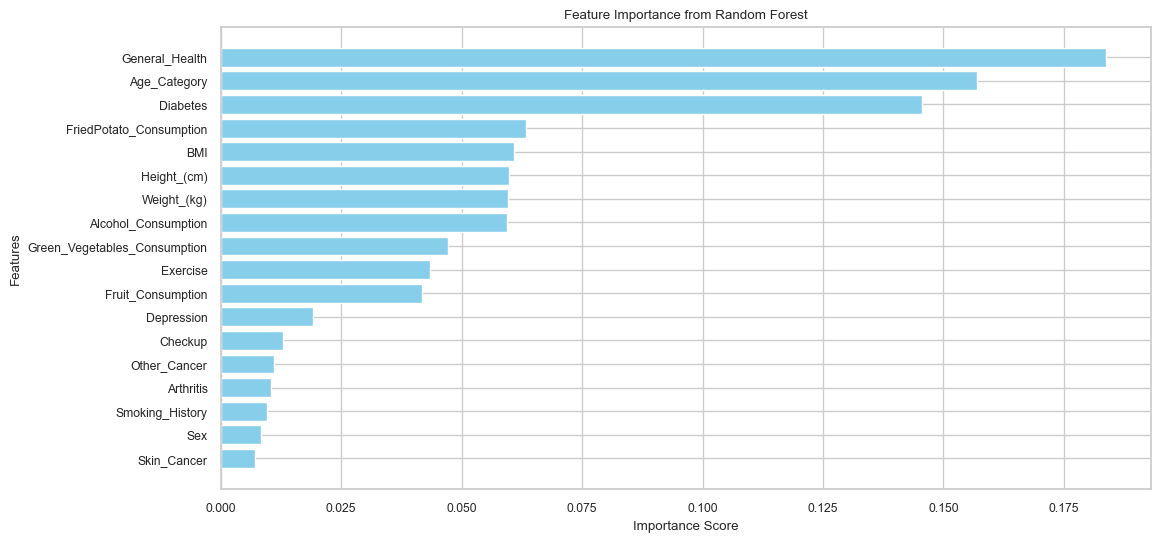

In [27]:
# Assuming X is your feature matrix and y is your target variable
rfc = RFC(n_estimators=100, random_state=42)
rfc.fit(X, y)

# Get feature importances
feature_importances = rfc.feature_importances_

# Convert to DataFrame for better visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance feature on top
plt.show()

In [28]:
print(features_df.sort_values(by="Importance", ascending=False))

                         Feature  Importance
0                 General_Health    0.183823
9                   Age_Category    0.156983
6                       Diabetes    0.145520
17       FriedPotato_Consumption    0.063324
12                           BMI    0.060909
10                   Height_(cm)    0.059926
11                   Weight_(kg)    0.059654
14           Alcohol_Consumption    0.059308
16  Green_Vegetables_Consumption    0.047088
2                       Exercise    0.043339
15             Fruit_Consumption    0.041784
5                     Depression    0.019156
1                        Checkup    0.012890
4                   Other_Cancer    0.010969
7                      Arthritis    0.010373
13               Smoking_History    0.009566
8                            Sex    0.008335
3                    Skin_Cancer    0.007055


In [29]:
# Set a threshold for feature importance (e.g., 0.02)
threshold = 0.01

# Select features that have importance greater than the threshold
selected_columns = features_df[features_df['Importance'] > threshold]['Feature'].tolist()

print("Selected Features:", selected_columns)

Selected Features: ['General_Health', 'Age_Category', 'Diabetes', 'FriedPotato_Consumption', 'BMI', 'Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption', 'Green_Vegetables_Consumption', 'Exercise', 'Fruit_Consumption', 'Depression', 'Checkup', 'Other_Cancer', 'Arthritis']


In [30]:
X_train = X_train[selected_columns]

X_train.shape

(454212, 15)

In [31]:
X_test = X_test[selected_columns]

In [38]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     56777
           1       0.95      0.93      0.94     56777

    accuracy                           0.94    113554
   macro avg       0.94      0.94      0.94    113554
weighted avg       0.94      0.94      0.94    113554



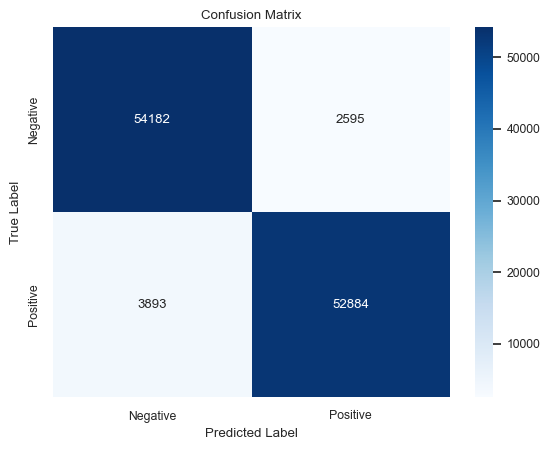



ROC-AUC Score: 0.984
Accuracy: 0.943


In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Predictions
y_pred = rfc.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC Score
roc_score = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])
print(f"\n\nROC-AUC Score: {roc_score:.3f}")

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

In [60]:
input_data = (1,12,1,8,28.73,180,93.44,0,30,1,30,0,5,0,0)

#change the input data to a numpy array
input_data = np.asarray(input_data)

#reshape
input_data = input_data.reshape(1,-1)

prediction = rfc.predict(input_data)
print(prediction)

if prediction == 0 :
    print("The person doesn't have heart disease")
else:
    print("The person has heart disease")


[1]
The person has heart disease


In [128]:
import pickle

In [136]:
filename = 'heart_disease_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [146]:
#loading the saved modelimport os

# Ensure the correct path
filename = '../models/heart_disease_model.sav'  # If it's inside a "models" folder

# Check if the file exists before loading
if os.path.exists(filename):
    loaded_model = pickle.load(open(filename, 'rb'))
    print("Model loaded successfully!")
else:
    print(f"Error: File '{filename}' not found. Check the path!")


Model loaded successfully!


In [148]:
input_data = (1,12,1,8,28.73,180,93.44,0,30,1,30,0,5,0,0)

#change the input data to a numpy array
input_data = np.asarray(input_data)

#reshape
input_data = input_data.reshape(1,-1)

prediction = loaded_model.predict(input_data)
print(prediction)

if prediction == 0 :
    print("The person doesn't have heart disease")
else:
    print("The person has heart disease")

[1]
The person has heart disease
